In [ ]:
!rm -rf "/content/Tutorial-TextRecognitionDataGenerator"


In [ ]:
%cd /content/
!git clone https://github.com/NinaM31/Tutorial-TextRecognitionDataGenerator.git

/content
Cloning into 'Tutorial-TextRecognitionDataGenerator'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 63 (delta 18), reused 44 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 528.69 KiB | 3.65 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
%cd /content/Tutorial-TextRecognitionDataGenerator/
!pip install -r requirements.txt

/content/Tutorial-TextRecognitionDataGenerator
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.

In [ ]:
import pandas as pd

# Sample data (list of Arabic names and their corresponding gender)
data = {
    #'Name': ['مسلمة',"مسلم","مسلم"]  # Repeating the words 50 times to create 100 rows
    'Name': ['مسيحي',"مسيحية","مسيحي"]  # Repeating the words 50 times to create 100 rows

}

# Create DataFrame
df = pd.DataFrame(data)

# Specify the path where you want to save the CSV file
csv_path = '/content/Tutorial-TextRecognitionDataGenerator/Arabic_names.csv'

# Save DataFrame to CSV
df.to_csv(csv_path, index=False, encoding='utf-8')  # Set index=False to avoid saving the index column

print(f"CSV file created at: {csv_path}")


CSV file created at: /content/Tutorial-TextRecognitionDataGenerator/Arabic_names.csv


In [ ]:
import shutil

# Specify the path to the directory
folder_path = '/content/Tutorial-TextRecognitionDataGenerator/images/.ipynb_checkpoints'

# Delete the folder and its contents
shutil.rmtree(folder_path)

In [ ]:
import os
import shutil

# Path to the directory you want to delete and recreate
folder_path = '/content/Tutorial-TextRecognitionDataGenerator/synth_sample'  # Adjust path as needed

# Step 1: Check if the folder exists
if os.path.exists(folder_path):
    # Step 2: Delete the folder and all its contents
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' and all its contents have been deleted.")
else:
    print(f"Folder '{folder_path}' does not exist.")

# Step 3: Recreate the folder
os.makedirs(folder_path)
print(f"Folder '{folder_path}' has been recreated.")


Folder '/content/Tutorial-TextRecognitionDataGenerator/synth_sample' and all its contents have been deleted.
Folder '/content/Tutorial-TextRecognitionDataGenerator/synth_sample' has been recreated.


In [ ]:
import os
import random
import pandas as pd
import numpy as np
from PIL import ImageEnhance, Image, ImageFilter
from trdg.generators import GeneratorFromStrings
from arabic_reshaper import ArabicReshaper
from bidi.algorithm import get_display
import cv2

os.chdir('/content/Tutorial-TextRecognitionDataGenerator/')
output_dir = '/content/Tutorial-TextRecognitionDataGenerator/synth_sample'
fonts_dir = '/content/Tutorial-TextRecognitionDataGenerator/fonts'
os.makedirs(output_dir, exist_ok=True)

csv_file_path = '/content/Tutorial-TextRecognitionDataGenerator/Arabic_names.csv'
df = pd.read_csv(csv_file_path)
strings = df.iloc[:, 0].tolist()

def ar_generate_data(strings, fonts, size=100, limit=500, image_dir='/content/Tutorial-TextRecognitionDataGenerator/images/', output_dir='synth_sample/', start_index=0):
    reshaped_strings = [get_display(ArabicReshaper().reshape(str(w))) for w in strings]

    generator = GeneratorFromStrings(reshaped_strings,
                                     random_blur=True,
                                     random_skew=True,
                                     skewing_angle=random.randint(0, 5),
                                     width=200,
                                     distorsion_orientation=2,
                                     distorsion_type=3,
                                     margins=(random.randint(5, 12),random.randint(0, 15),random.randint(5, 12),random.randint(0, 15)),
                                     blur=random.choice([0, 1, 1, 1, 2, 2, 2, 2, 3, 3]),
                                     language='ar',
                                     fonts=fonts,
                                     size=size,
                                     background_type=3,
                                     image_dir=image_dir)

    generated_labels = []
    for img, label in generator:
        if limit <= 0:
            break
        img = augment_image(img)
        name = f"{start_index + (500 - limit)}.jpg"
        path_to_image = os.path.join(output_dir, name)
        img.save(path_to_image)
        generated_labels.append((path_to_image, get_display(ArabicReshaper().reshape(str(label)))))
        limit -= 1

    save_txt(generated_labels, output_dir)

def save_txt(strings, path):
    with open(os.path.join(path, 'labels.txt'), 'w', encoding='utf8') as label_file:
        for l in strings:
            label_file.write('\t'.join(l) + '\n')

def augment_image(img):
    img = img.convert('RGB')
    img = ImageEnhance.Brightness(img).enhance(random.uniform(0.4, 0.9))
    img = ImageEnhance.Contrast(img).enhance(random.uniform(0.5, 1.5))
    img = ImageEnhance.Color(img).enhance(random.uniform(0.5, 1.1))

    data = np.array(img)
    temp_factor = random.uniform(0.9, 1.3)
    data = data * [temp_factor, temp_factor, 1] if temp_factor > 1 else data * [1, 1, 1 / temp_factor]
    img = Image.fromarray(np.clip(data, 0, 255).astype(np.uint8))

    motion_type = random.choice(['horizontal', 'vertical', 'diagonal'])
    img = add_motion_blur(img, motion_type)

    return img

def add_motion_blur(img, direction='horizontal'):
    size = random.randint(3, 8)
    angle = random.randint(0, 360)

    if direction == 'horizontal':
        kernel = np.zeros((size, size))
        kernel[size // 2, :] = np.ones(size)
        kernel /= size
    elif direction == 'vertical':
        kernel = np.zeros((size, size))
        kernel[:, size // 2] = np.ones(size)
        kernel /= size
    elif direction == 'diagonal':
        kernel = np.zeros((size, size))
        np.fill_diagonal(kernel, 1)
        kernel /= size

    kernel = np.array(kernel)
    img = np.array(img)
    img = cv2.filter2D(img, -1, kernel)
    img = Image.fromarray(np.clip(img, 0, 255).astype(np.uint8))

    return img

font_files = [os.path.join(fonts_dir, font) for font in os.listdir(fonts_dir) if font.endswith('.ttf')]
if not font_files:
    raise ValueError("No valid fonts found in the fonts directory.")

mini_batch_size = 5
total_images = 250
for i in range(0, total_images, mini_batch_size):
    ar_generate_data(strings, font_files, size=random.randint(50, 70), limit=mini_batch_size, output_dir=output_dir, start_index=i*10000)

print("Data generation complete!")


Data generation complete!


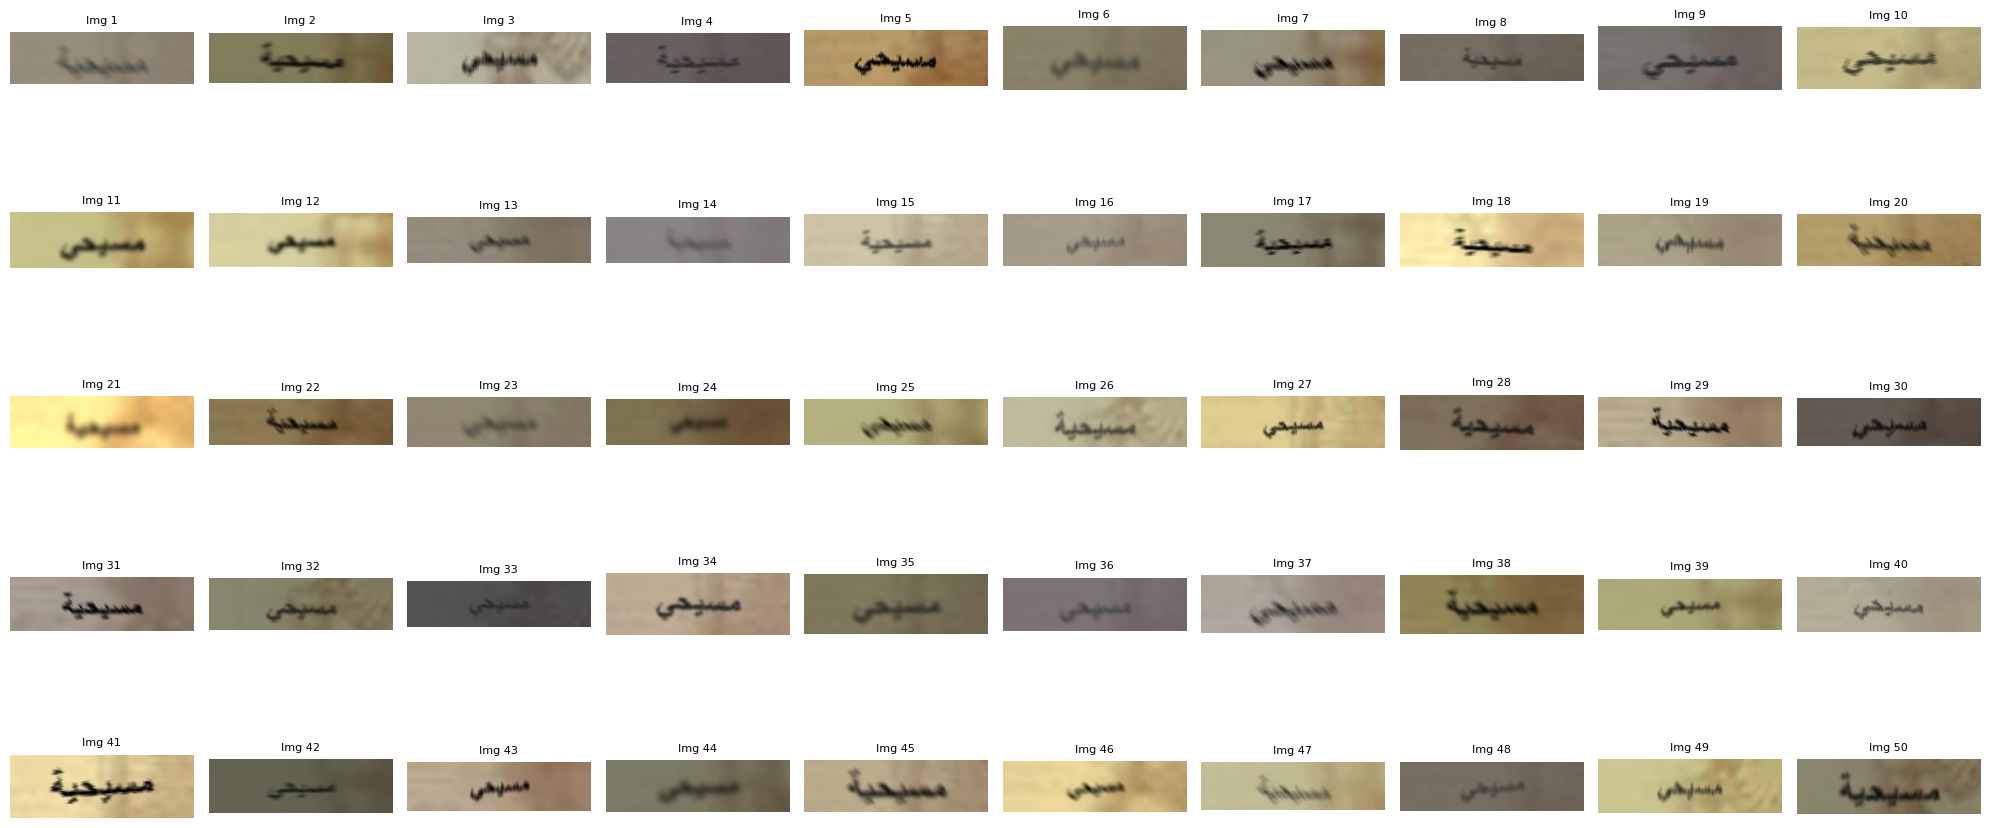

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import random

# Define the directory where the images are saved
output_dir = 'synth_sample/'

# Get image files and shuffle them
image_files = [f for f in os.listdir(output_dir) if f.endswith('.jpg')]
random.shuffle(image_files)  # Shuffle the image filenames

# Set up the matplotlib figure (1 row, 50 columns for 50 images)
fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # Adjusted to display 50 images in a row

# Preload images in a list (use resized version to save memory)
images = []
for file in image_files[:50]:  # Load only the first 50 images after shuffling
    img = Image.open(os.path.join(output_dir, file))
    #img_resized = img.resize((224, 224), Image.ANTIALIAS)  # Resize to 224x224
    images.append(np.array(img))

# Convert list of images into a numpy array for better memory usage
images = np.array(images)

# Plot the images
for i, ax in enumerate(axes.flat[:50]):  # Plot only the first 50 images
    ax.imshow(images[i])
    ax.axis('off')  # Hide axes
    ax.set_title(f'Img {i+1}', fontsize=8)  # Smaller font size for readability

# Adjust the layout and display
plt.tight_layout()
plt.show()


In [ ]:
import shutil
folder_to_compress = '/content/Tutorial-TextRecognitionDataGenerator/synth_sample'
output_zip = '/content/Tutorial-TextRecognitionDataGenerator/synth_sample.zip'
shutil.make_archive(output_zip, 'zip', folder_to_compress)
print("Compression complete!")

Compression complete!
